# 1. 读取数据

In [20]:
# 导入必备工具包
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Alibaba PuHuiTi'
# 设置显示风格
plt.style.use('fivethirtyeight') 

In [21]:

# 分别读取训练tsv和验证tsv
train_data = pd.read_csv("../data/cn_data/train.tsv", sep="\t")
valid_data = pd.read_csv("../data/cn_data/dev.tsv", sep="\t")

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2960 non-null   object
 1   label     2960 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.4+ KB


# 3 获取标签数量分布

In [23]:
import matplotlib
from matplotlib import font_manager

font_list=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in font_list:
    print(i)

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Compact
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
Abril Fatface
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
Alibaba PuHuiTi
Alibaba PuHuiTi
Alibaba PuHuiTi
Alibaba PuHuiTi
Alibaba PuHuiTi
Amatic SC
Amatic SC
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Archivo Narrow
Archivo Narrow
Archivo Narrow
Archivo Narrow
Archivo Narrow
Archivo Narrow
Archivo Narrow
Archivo Narrow
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
B612 Mono
B612 Mono
B612 Mono
B612 Mono
Baghdad
Bangla MN
Bangla Sangam MN
Barlow Condensed
Barlow Condensed
Barlow Condensed
Barlow Condensed
Barlow Condensed
Barlow Condensed
Barlow Condense

Text(0.5, 1.0, 'valid_data')

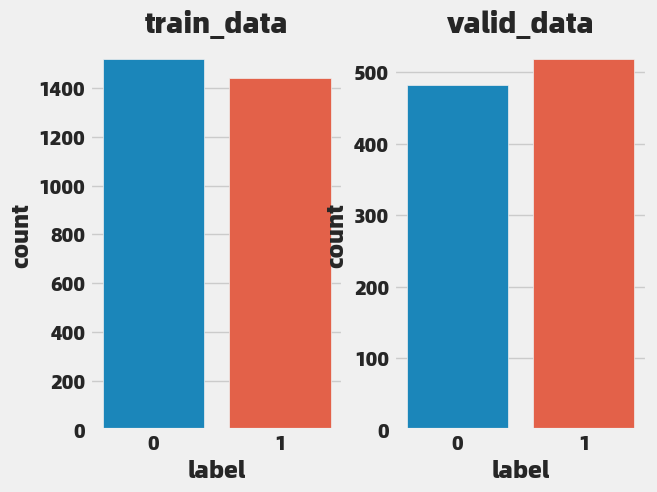

In [24]:
fig,axes=plt.subplots(1,2)
# 获得训练数据标签数量分布
sns.countplot(train_data, x='label', ax=axes[0])
axes[0].set_title("train_data")

# 获取验证数据标签数量分布
sns.countplot(valid_data, x='label', ax=axes[1])
axes[1].set_title("valid_data")

# 4 获取句子长度分布

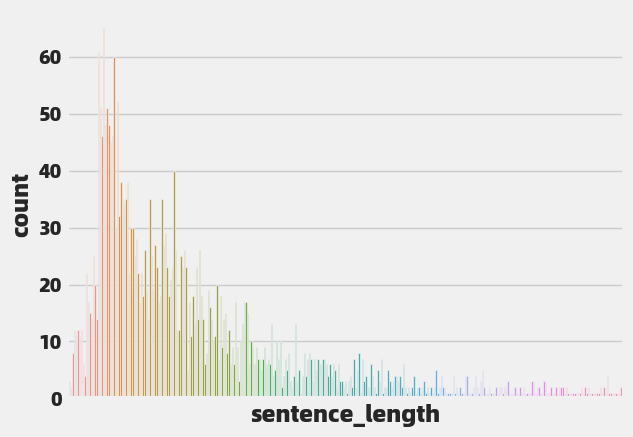

In [25]:
# 在训练数据中添加新的句子长度列, 每个元素的值都是对应的句子列的长度
train_data["sentence_length"] = train_data.sentence.apply(lambda x: len(x))
# 绘制句子长度列的数量分布图
sns.countplot(train_data, x='sentence_length')
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

/var/folders/z8/y_hn633943lgllk3gb3g61r00000gn/T/ipykernel_742/4189206272.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["sentence_length"])


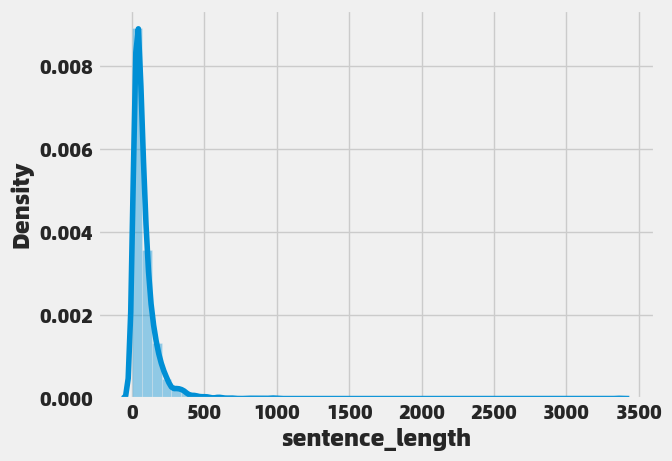

In [26]:

# 绘制dist长度分布图
sns.distplot(train_data["sentence_length"])

# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
# plt.yticks([])
plt.show()


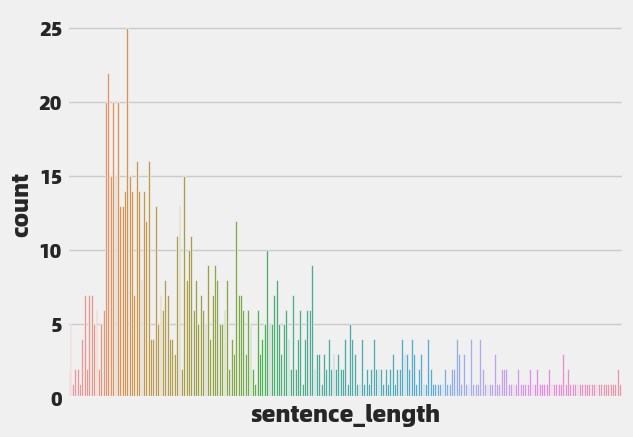

/var/folders/z8/y_hn633943lgllk3gb3g61r00000gn/T/ipykernel_742/1038451154.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_data["sentence_length"])


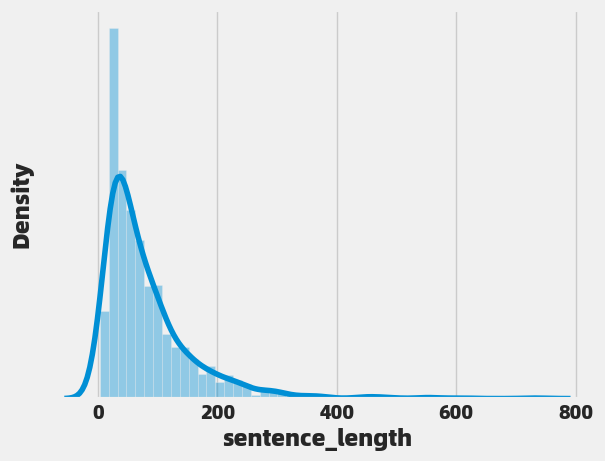

In [27]:

# 在验证数据中添加新的句子长度列, 每个元素的值都是对应的句子列的长度
valid_data["sentence_length"] = valid_data["sentence"].apply(lambda x: len(x))

# 绘制句子长度列的数量分布图
sns.countplot(valid_data, x="sentence_length")

# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
sns.distplot(valid_data["sentence_length"])

# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()


# 5 获取正负样本长度散点分布

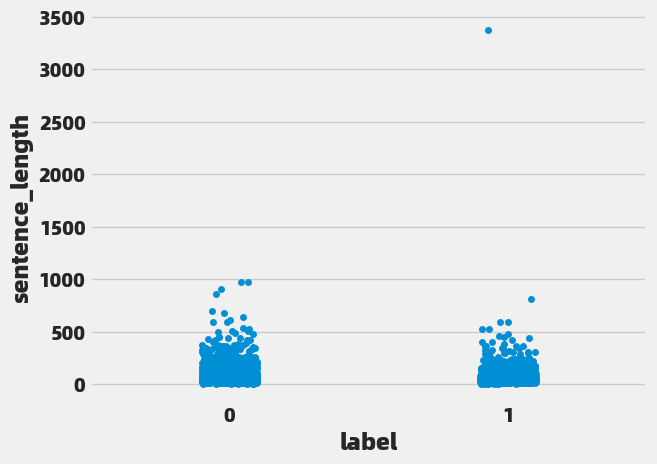

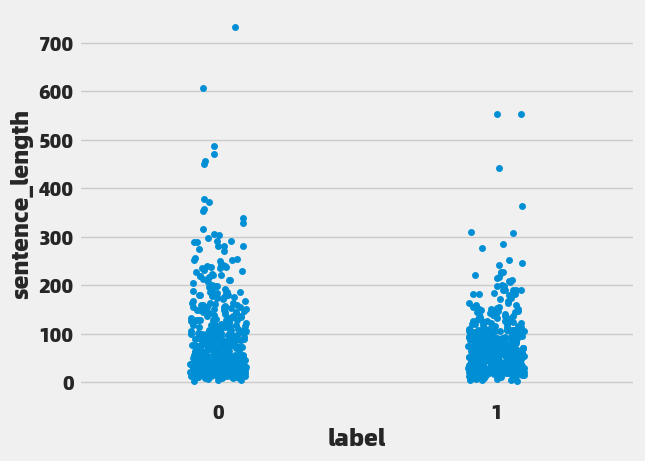

In [28]:
# 绘制训练集长度分布的散点图
sns.stripplot(train_data, y='sentence_length',x='label')
plt.show()

# 绘制验证集长度分布的散点图
sns.stripplot(valid_data, y='sentence_length',x='label')
plt.show()

# 6 获取不同词汇总数统计

In [29]:
# 导入jieba用于分词
# 导入chain方法用于扁平化列表
import jieba
from itertools import chain

# 进行训练集的句子进行分词, 并统计出不同词汇的总数
train_vocab = set(chain(*map(lambda x: jieba.lcut(x), train_data["sentence"])))
print("训练集共包含不同词汇总数为：", len(train_vocab))

# 进行验证集的句子进行分词, 并统计出不同词汇的总数
valid_vocab = set(chain(*map(lambda x: jieba.lcut(x), valid_data["sentence"])))
print("训练集共包含不同词汇总数为：", len(valid_vocab))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/z8/y_hn633943lgllk3gb3g61r00000gn/T/jieba.cache
Loading model cost 0.679 seconds.
Prefix dict has been built successfully.


训练集共包含不同词汇总数为： 12162
训练集共包含不同词汇总数为： 6857


# 7 获取高频形容词词云

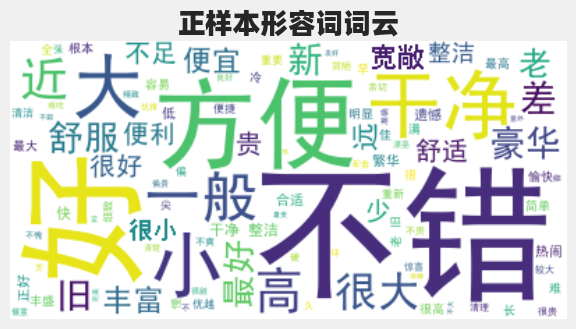

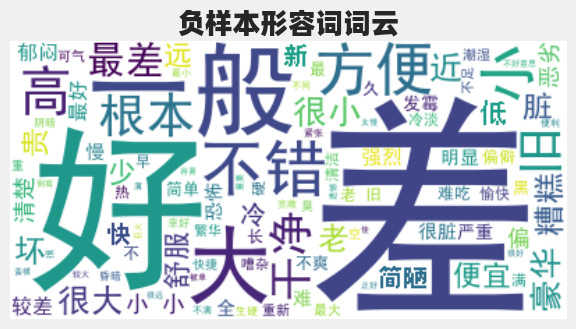

In [30]:
# 训练集
# 使用jieba中的词性标注功能
import jieba.posseg as pseg

def get_a_list(text):
    """用于获取形容词列表"""
    # 使用jieba的词性标注方法切分文本,获得具有词性属性flag和词汇属性word的对象, 
    # 从而判断flag是否为形容词,来返回对应的词汇
    r = []
    for g in pseg.lcut(text):
        if g.flag == "a":
            r.append(g.word)
    return r

# 导入绘制词云的工具包
from wordcloud import WordCloud

def get_word_cloud(keywords_list, title):
    # 实例化绘制词云的类, 其中参数font_path是字体路径, 为了能够显示中文, 
    # max_words指词云图像最多显示多少个词, background_color为背景颜色 
    wordcloud = WordCloud(font_path="../data/SimHei.ttf", max_words=100, background_color="white")
    # 将传入的列表转化成词云生成器需要的字符串形式
    keywords_string = " ".join(keywords_list)
    # 生成词云
    wordcloud.generate(keywords_string)

    # 绘制图像并显示
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# 获得训练集上正样本
p_train_data = train_data[train_data["label"]==1]["sentence"]

# 对正样本的每个句子的形容词
train_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_train_data))
#print(train_p_n_vocab)

# 获得训练集上负样本
n_train_data = train_data[train_data["label"]==0]["sentence"]

# 获取负样本的每个句子的形容词
train_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_train_data))

# 调用绘制词云函数
get_word_cloud(train_p_a_vocab, '正样本形容词词云')
get_word_cloud(train_n_a_vocab, '负样本形容词词云')

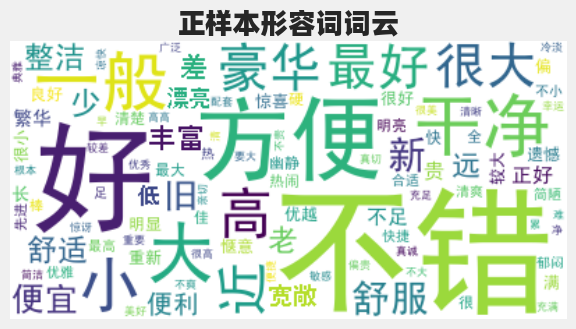

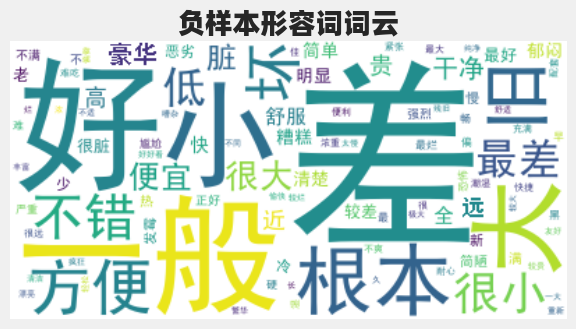

In [31]:
# 获得验证集上正样本
p_valid_data = valid_data[valid_data["label"]==1]["sentence"]

# 对正样本的每个句子的形容词
valid_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_valid_data))
#print(train_p_n_vocab)

# 获得验证集上负样本
n_valid_data = valid_data[valid_data["label"]==0]["sentence"]

# 获取负样本的每个句子的形容词
valid_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_valid_data))

# 调用绘制词云函数
get_word_cloud(valid_p_a_vocab, '正样本形容词词云')
get_word_cloud(valid_n_a_vocab, '负样本形容词词云')
